# Emotion Classifier Example Project

## TODO

Bagus! Kalau kamu ingin **step-by-step** tanpa detail kode, agar bisa dicoba dan dipelajari sendiri, berikut adalah alur kerja yang bisa kamu ikuti di **Jupyter Notebook**, mulai dari load data sampai save model menggunakan `pickle`, lalu mencoba inference sederhana:

---

### 🧪 Tahapan Umum: Train & Save Model (Train Phase)

1. **Persiapkan environment**
   - Aktifkan virtual environment
   - Instal library yang dibutuhkan (`pandas`, `scikit-learn`, `pyarrow`, `pickle`)

2. **Import library yang diperlukan**
   - Contoh: `pandas`, `numpy`, `sklearn`, `pickle`

3. **Load dataset**
   - Gunakan `pd.read_parquet()` untuk membaca file `.parquet`
   - Pastikan kolom teks dan label emosi sudah benar

4. **Eksplorasi awal**
   - Tampilkan beberapa baris data
   - Cek distribusi label emosi

5. **Preprocessing sederhana**
   - Bersihkan teks (hapus karakter aneh, lowercase, dll)
   - Pertimbangkan tokenisasi atau hapus stopwords (opsional)

6. **Split data**
   - Pisahkan menjadi data latih dan data uji
   - Pisahkan juga antara fitur (`X`) dan target (`y`)

7. **Vektorisasi teks**
   - Gunakan `TfidfVectorizer` atau `CountVectorizer`
   - Sesuaikan dengan kebutuhan model

8. **Latih model**
   - Pilih model seperti `SVM`, `Naive Bayes`, atau `Random Forest`
   - Latih model menggunakan data latih

9. **Evaluasi model**
   - Uji performa model dengan data uji
   - Lihat akurasi, precision, recall, dll

10. **Simpan model dan vectorizer**
    - Gunakan `pickle.dump()` untuk menyimpan model dan vectorizer
    - Simpan dalam file `.pkl`

---

### ⚙️ Tahapan Inference (Test Phase)

11. **Muat model dan vectorizer**
    - Gunakan `pickle.load()` untuk memuat kembali model dan vectorizer

12. **Masukkan teks baru**
    - Ketik atau input teks bebas sebagai input pengguna

13. **Lakukan preprocessing**
    - Lakukan hal yang sama seperti saat training

14. **Transformasi teks**
    - Gunakan vectorizer yang telah dimuat untuk mengubah teks

15. **Prediksi emosi**
    - Gunakan model untuk memprediksi label emosi dari teks

16. **Tampilkan hasil**
    - Print atau tampilkan hasil prediksi

---

### ✅ Tips:
- Coba satu-satu setiap tahap
- Jika error, cek kembali langkah sebelumnya
- Mainkan dataset dan model untuk eksperimen

Kamu sudah punya semua informasi yang cukup untuk melanjutkan.

Selamat belajar dan bereksperimen! Kalau ada kendala atau ingin lanjut ke integrasi Unity/C#, saya siap bantu 😄

## Preparation and Setup

In [240]:
import numpy as np
import pandas as pd
import sklearn

In [290]:
# emotion_dataframe = pd.read_parquet("emotions_dataset.parquet", engine="pyarrow")
emotion_dataframe = pd.read_parquet("emotion2.parquet", engine="pyarrow")

In [291]:
emotion_dataframe.head(10)

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
5,i find myself frustrated with christians becau...,2
6,i am one of those people who feels like going ...,1
7,i feel especially pleased about this as this h...,1
8,i was struggling with these awful feelings and...,1
9,i feel so enraged but helpless at the same time,3


In [292]:
# check length of table
len(emotion_dataframe)

416809

In [293]:
emotion_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


### Check is there any null or NaN data

In [294]:
isnull = emotion_dataframe.isnull().sum().sum()
isnull

np.int64(0)

In [295]:
isna = emotion_dataframe.isna().sum().sum()
isna

np.int64(0)

### Check labels

In [297]:
labels = emotion_dataframe["label"].unique()
labels

array([0, 1, 2, 3, 4, 5])

## Preprocessing

### Clean Punctuation
except "?" and "!"

In [299]:
clean_sentence_data = emotion_dataframe.copy()

# menghapus tanda baca selain ! dan ?
clean_sentence_data["text"] = emotion_dataframe.copy()["text"].str.replace(r'[^\w\s]', '', regex=True)

clean_sentence_data.head(10)

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
5,i find myself frustrated with christians becau...,2
6,i am one of those people who feels like going ...,1
7,i feel especially pleased about this as this h...,1
8,i was struggling with these awful feelings and...,1
9,i feel so enraged but helpless at the same time,3


### Lowercase vs Sensitive-Case

#### Lowercase

In [249]:
lowercase_data = emotion_dataframe.copy()
lowercase_data["Sentence"] = lowercase_data["Sentence"].str.lower()

In [250]:
lowercase_data.head(10)

,Sentence,Label
0,unfortunately later died from eating tainted m...,happiness
1,last time i saw was loooong ago. basically bef...,neutral
2,you mean by number of military personnel? beca...,neutral
3,need to go middle of the road no name is going...,sadness
4,feel melty miserable enough imagine must,sadness
5,feel sense relief also sadness end colleagues ...,happiness
6,think get feel weird ones use dryers time,surprise
7,if your host stand has a register that isn’t l...,neutral
8,oh . someone finally posted something i cant b...,surprise
9,feel presence beloved behind tilt neck side sm...,love


In [251]:
#  just keep it taht way
sensi_case_data = emotion_dataframe.copy()
sensi_case_data.head(10)

,Sentence,Label
0,Unfortunately later died from eating tainted m...,happiness
1,Last time I saw was loooong ago. Basically bef...,neutral
2,You mean by number of military personnel? Beca...,neutral
3,Need to go middle of the road no NAME is going...,sadness
4,feel melty miserable enough imagine must,sadness
5,feel sense relief also sadness end colleagues ...,happiness
6,think get feel weird ones use dryers time,surprise
7,If your host stand has a register that isn’t l...,neutral
8,Oh . someone finally posted something I cant b...,surprise
9,feel presence beloved behind tilt neck side sm...,love


### Split Data

In [252]:
#lowercase
X_low = lowercase_data.copy()["Sentence"]
y_low = lowercase_data.copy()["Label"]

X_sensi = sensi_case_data.copy()["Sentence"]
y_sensi = sensi_case_data.copy()["Label"]


In [253]:
X_low, y_low

(0         unfortunately later died from eating tainted m...
 1         last time i saw was loooong ago. basically bef...
 2         you mean by number of military personnel? beca...
 3         need to go middle of the road no name is going...
 4                  feel melty miserable enough imagine must
                                 ...                        
 131301    yeah, shes reasonable on some issues for sure,...
 131302    >just something motor**sport** fans tell thems...
 131303                                what about hot water?
 131304                 i’d love to learn how to make bread.
 131305    dont give away my zip code! craft beer and fab...
 Name: Sentence, Length: 131306, dtype: object,
 0         happiness
 1           neutral
 2           neutral
 3           sadness
 4           sadness
             ...    
 131301    happiness
 131302    confusion
 131303    confusion
 131304       desire
 131305    happiness
 Name: Label, Length: 131306, dtype: object)

In [254]:
X_sensi, y_sensi

(0         Unfortunately later died from eating tainted m...
 1         Last time I saw was loooong ago. Basically bef...
 2         You mean by number of military personnel? Beca...
 3         Need to go middle of the road no NAME is going...
 4                  feel melty miserable enough imagine must
                                 ...                        
 131301    Yeah, shes reasonable on some issues for sure,...
 131302    >just something motor**sport** fans tell thems...
 131303                                What about hot water?
 131304                 I’d love to learn how to make bread.
 131305    Dont give away my zip code! Craft beer and fab...
 Name: Sentence, Length: 131306, dtype: object,
 0         happiness
 1           neutral
 2           neutral
 3           sadness
 4           sadness
             ...    
 131301    happiness
 131302    confusion
 131303    confusion
 131304       desire
 131305    happiness
 Name: Label, Length: 131306, dtype: object)

In [255]:
from sklearn.model_selection import train_test_split

X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2)

X_sensi_train, X_sensi_test, y_sensi_train, y_sensi_test = train_test_split(X_sensi, y_sensi, test_size=0.2)

## Tokenization

In [256]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer_low = CountVectorizer(token_pattern=r'(?u)\b\w+\b|[!?]')
# vectorizer_sensi = CountVectorizer(token_pattern=r'(?u)\b\w+\b|[!?]')

vectorizer_low = TfidfVectorizer()
vectorizer_sensi = TfidfVectorizer()

In [257]:
X_low_train_token = vectorizer_low.fit_transform(X_low_train)
X_low_test_token = vectorizer_low.transform(X_low_test)

In [258]:
X_sensi_train_token = vectorizer_sensi.fit_transform(X_sensi_train)
X_sensi_test_token = vectorizer_sensi.transform(X_sensi_test)

#### Label Encoder

In [259]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [260]:
y_low_train_encoded = le.fit_transform(y_low_train)
y_low_test_encoded = le.transform(y_low_test)

In [261]:
y_sensi_train_encoded = le.fit_transform(y_sensi_train)
y_sensi_test_encoded = le.transform(y_sensi_test)

## Training

### Naive Bayes method

In [262]:
from sklearn.naive_bayes import MultinomialNB

In [263]:
model_low = MultinomialNB()

# training
model_low.fit(X_low_train_token, y_low_train_encoded)

MultinomialNB()

In [264]:
model_sensi = MultinomialNB()

# training
model_sensi.fit(X_sensi_train_token, y_sensi_train_encoded)

MultinomialNB()

### SVM method

In [265]:
from sklearn.svm import LinearSVC

In [266]:
model_svm_low = LinearSVC(random_state=42, max_iter=1000)

model_svm_low.fit(X_low_train_token, y_low_train_encoded)

LinearSVC(random_state=42)

In [267]:
model_svm_sensi = LinearSVC(random_state=42, max_iter=1000)

model_svm_sensi.fit(X_sensi_train_token, y_sensi_train_encoded)

LinearSVC(random_state=42)

## Evaluate

In [268]:
from sklearn.metrics import accuracy_score, classification_report

### Naive Bayes Method

In [269]:
# Prediksi
y_low_pred = model_low.predict(X_low_test_token)

# Akurasi
print("Akurasi:", accuracy_score(y_low_test_encoded, y_low_pred))

# Laporan klasifikasi
print(classification_report(y_low_test_encoded, y_low_pred))

Akurasi: 0.4028253750666362
              precision    recall  f1-score   support

           0       0.61      0.21      0.32      2704
           1       0.61      0.01      0.02      1658
           2       1.00      0.17      0.29       469
           3       0.74      0.16      0.27      1673
           4       0.94      0.23      0.37      1720
           5       0.98      0.13      0.23       688
           6       0.31      0.97      0.47      6256
           7       0.85      0.04      0.08      2115
           8       0.44      0.14      0.22      3175
           9       0.64      0.58      0.61      3498
          10       1.00      0.79      0.88       511
          11       0.90      0.09      0.16       854
          12       0.83      0.01      0.01       941

    accuracy                           0.40     26262
   macro avg       0.76      0.27      0.30     26262
weighted avg       0.61      0.40      0.34     26262



In [270]:
# Prediksi
y_sensi_pred = model_sensi.predict(X_sensi_test_token)

# Akurasi
print("Akurasi:", accuracy_score(y_sensi_test_encoded, y_sensi_pred))

# Laporan klasifikasi
print(classification_report(y_sensi_test_encoded, y_sensi_pred))

Akurasi: 0.3999314599040439
              precision    recall  f1-score   support

           0       0.60      0.21      0.31      2692
           1       0.74      0.01      0.02      1674
           2       1.00      0.17      0.29       486
           3       0.74      0.16      0.27      1691
           4       0.92      0.23      0.37      1746
           5       0.97      0.15      0.27       673
           6       0.31      0.97      0.47      6234
           7       0.76      0.05      0.09      2060
           8       0.39      0.12      0.18      3167
           9       0.65      0.57      0.61      3562
          10       1.00      0.77      0.87       531
          11       0.97      0.07      0.13       885
          12       1.00      0.01      0.01       861

    accuracy                           0.40     26262
   macro avg       0.77      0.27      0.30     26262
weighted avg       0.62      0.40      0.33     26262



### SVM Method

In [271]:
# Prediksi
y_low_svm_pred = model_svm_low.predict(X_low_test_token)

# Akurasi
print("Akurasi:", accuracy_score(y_low_test_encoded, y_low_svm_pred))

# Laporan klasifikasi
print(classification_report(y_low_test_encoded, y_low_svm_pred))

Akurasi: 0.5846850963369127
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      2704
           1       0.30      0.20      0.24      1658
           2       0.85      0.78      0.81       469
           3       0.42      0.35      0.39      1673
           4       0.71      0.73      0.72      1720
           5       0.45      0.38      0.41       688
           6       0.65      0.74      0.69      6256
           7       0.58      0.49      0.53      2115
           8       0.44      0.53      0.48      3175
           9       0.69      0.74      0.71      3498
          10       0.96      0.98      0.97       511
          11       0.45      0.33      0.38       854
          12       0.56      0.31      0.40       941

    accuracy                           0.58     26262
   macro avg       0.59      0.55      0.56     26262
weighted avg       0.58      0.58      0.58     26262



In [272]:
# Prediksi
y_sensi_svm_pred = model_svm_sensi.predict(X_sensi_test_token)

# Akurasi
print("Akurasi:", accuracy_score(y_sensi_test_encoded, y_sensi_svm_pred))

# Laporan klasifikasi
print(classification_report(y_sensi_test_encoded, y_sensi_svm_pred))

Akurasi: 0.5878836341481989
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      2692
           1       0.29      0.20      0.23      1674
           2       0.83      0.79      0.81       486
           3       0.43      0.37      0.40      1691
           4       0.74      0.74      0.74      1746
           5       0.43      0.41      0.42       673
           6       0.65      0.74      0.69      6234
           7       0.58      0.53      0.55      2060
           8       0.44      0.51      0.47      3167
           9       0.70      0.74      0.72      3562
          10       0.98      0.97      0.97       531
          11       0.48      0.31      0.37       885
          12       0.52      0.32      0.40       861

    accuracy                           0.59     26262
   macro avg       0.58      0.55      0.56     26262
weighted avg       0.58      0.59      0.58     26262



## Test on Text

In [273]:
kalimat_baru = ["what the fuck man"]

X_baru = vectorizer_low.transform(kalimat_baru)

prediksi = model_svm_low.predict(X_baru)

prediksi_label = le.inverse_transform(prediksi)
print("Prediksi emosi:", prediksi_label[0])

Prediksi emosi: anger


In [278]:
kalimat_baru = ["yeah whatever"]

X_baru = vectorizer_sensi.transform(kalimat_baru)

prediksi = model_svm_sensi.predict(X_baru)

prediksi_label = le.inverse_transform(prediksi)
print("Prediksi emosi:", prediksi_label[0])

Prediksi emosi: neutral


In [279]:
kalimat_baru = ["yeah whatever"]

X_baru = vectorizer_low.transform(kalimat_baru)

prediksi = model_low.predict(X_baru)

prediksi_label = le.inverse_transform(prediksi)
print("Prediksi emosi:", prediksi_label[0])

Prediksi emosi: happiness


## Visualization Dataset

still not good enough

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15756\3692452237.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


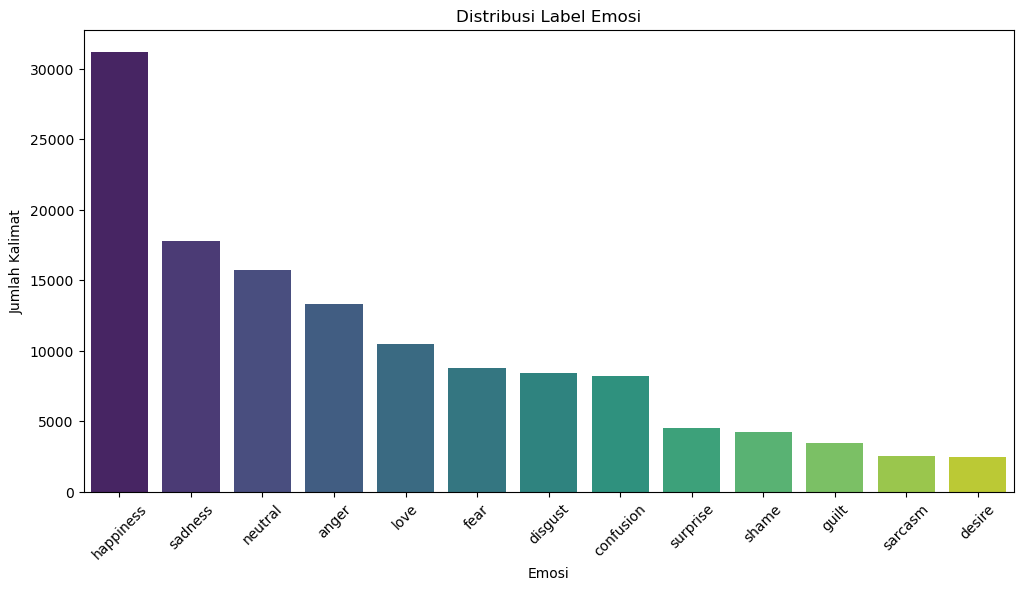

Label
happiness    31205
sadness      17809
neutral      15733
anger        13341
love         10512
fear          8795
disgust       8407
confusion     8209
surprise      4560
shame         4248
guilt         3470
sarcasm       2534
desire        2483
Name: count, dtype: int64


In [280]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah setiap label
label_counts = emotion_dataframe['Label'].value_counts()

# Tampilkan dalam bentuk bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribusi Label Emosi')
plt.xlabel('Emosi')
plt.ylabel('Jumlah Kalimat')
plt.xticks(rotation=45)
plt.show()

print(label_counts)

## Revisi

hasilnya belum bagus soalnya 

In [282]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download resources NLTK (cukup jalankan sekali)
nltk.download('punkt')
nltk.download('punkt_tab') # Ditambahkan untuk mengatasi LookupError
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(lemmatized_words)

# Terapkan fungsi preprocessing
preprocessed_sentences = lowercase_data['Sentence'].apply(preprocess_text)

clean_df = pd.DataFrame({
    'Sentence': preprocessed_sentences,
    'Label': lowercase_data['Label']
})

print("Contoh data setelah preprocessing:")
print(clean_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Contoh data setelah preprocessing:
                                            Sentence      Label
0  unfortunately later died eating tainted meat n...  happiness
1  last time saw loooong ago basically ln announc...    neutral
2  mean number military personnel go navy size bu...    neutral
3           need go middle road name going vote name    sadness
4           feel melty miserable enough imagine must    sadness


In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tuning vectorizer: n-grams (1,2), dan filter frekuensi kata min/max
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2), 
    min_df=5,
    max_df=0.7
)

X_clean = clean_df['Sentence']
y_clean = clean_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

X_train_token = vectorizer.fit_transform(X_train)
X_test_token = vectorizer.transform(X_test)

In [289]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Tambahkan class_weight='balanced' untuk menangani data tidak seimbang
model_svm = LinearSVC(random_state=42, class_weight='balanced', max_iter=2000)

model_svm.fit(X_train_token, y_train)

y_pred = model_svm.predict(X_test_token)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, labels=y_train.unique()))

Akurasi: 0.5641992232122458

Laporan Klasifikasi:
              precision    recall  f1-score   support

        fear       0.71      0.74      0.73      1742
   happiness       0.74      0.59      0.66      6349
     sarcasm       0.94      0.98      0.96       503
     sadness       0.77      0.72      0.74      3527
      desire       0.70      0.82      0.75       486
       guilt       0.32      0.43      0.36       685
       anger       0.57      0.55      0.56      2668
     neutral       0.45      0.44      0.45      3171
     disgust       0.37      0.41      0.39      1688
    surprise       0.32      0.41      0.36       911
        love       0.56      0.64      0.60      2078
       shame       0.29      0.40      0.34       839
   confusion       0.24      0.27      0.26      1615

    accuracy                           0.56     26262
   macro avg       0.54      0.57      0.55     26262
weighted avg       0.58      0.56      0.57     26262



In [288]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline menggabungkan vectorizer dan classifier
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC(random_state=42, class_weight='balanced', max_iter=3000))
])

# Definisikan parameter grid yang ingin diuji
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__min_df': [3, 5],
    'clf__C': [0.1, 1, 10],
}

# Inisialisasi GridSearchCV. n_jobs=-1 menggunakan semua core CPU
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

# Gunakan data teks mentah (belum di-vectorize)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print("Memulai GridSearchCV... Ini akan memakan waktu lama.")
grid_search.fit(X_train_orig, y_train_orig)

print("\nParameter terbaik ditemukan: ", grid_search.best_params_)
print("Skor cross-validation terbaik: ", grid_search.best_score_)

# Evaluasi model terbaik di data test
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_orig)

print("\nAkurasi pada data test dengan model terbaik:", accuracy_score(y_test_orig, y_pred_best))
print("\nLaporan Klasifikasi pada data test:")
print(classification_report(y_test_orig, y_pred_best, labels=y_train.unique()))

Memulai GridSearchCV... Ini akan memakan waktu lama.
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Parameter terbaik ditemukan:  {'clf__C': 0.1, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}
Skor cross-validation terbaik:  0.5736834186584031

Akurasi pada data test dengan model terbaik: 0.5851420303099536

Laporan Klasifikasi pada data test:
              precision    recall  f1-score   support

        fear       0.72      0.74      0.73      1742
   happiness       0.77      0.60      0.67      6349
     sarcasm       0.80      0.99      0.89       503
     sadness       0.79      0.71      0.74      3527
      desire       0.59      0.86      0.70       486
       guilt       0.36      0.59      0.44       685
       anger       0.61      0.56      0.59      2668
     neutral       0.46      0.51      0.48      3171
     disgust       0.43      0.43      0.43      1688
    surprise       0.38      0.45      0.41       911
        love       0.56      0.68      0.61